<a href="https://colab.research.google.com/github/astuart06/Colab_dev/blob/master/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/GPflow/GPflow.git
!pip install gpflow

fatal: destination path 'GPflow' already exists and is not an empty directory.


In [4]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install gpflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gpflow

print("Module import done")

Module import done


In [5]:
N = 10
M = 100

x_train = np.random.uniform(-3.,3.,(N,1))
# x_train = np.linspace(-2.,2.,N).reshape((N,1))
y_train = np.sin(x_train) + np.random.randn(N,1)*0.1

x_test = np.linspace(-3.,3.,M).reshape((M,1))
y_true = np.sin(x_test)

print("t_train")
print(x_train)

t_train
[[ 0.62862461]
 [ 0.91256476]
 [-2.34497347]
 [ 2.21329161]
 [-0.28810529]
 [-2.44163841]
 [-0.64535124]
 [ 0.73124718]
 [-2.13537455]
 [-2.93044983]]


In [6]:

kernel = gpflow.kernels.RBF(input_dim=1, variance=1., lengthscales=1.)
# kernel = gpflow.kernels.Linear(1)
# kernel = gpflow.kernels.Linear(1) + gpflow.kernels.Linear(1)*gpflow.kernels.Linear(1) # Gives a quadratic!
# kernel = gpflow.kernels.Matern32(1) + gpflow.kernels.Linear(1)

In [0]:
with gpflow.defer_build():
    m = gpflow.models.GPR(x_train, y_train, kern=kernel)

In [8]:
# m.kern.variance = 2 Can change values
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [9]:
m.compile()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


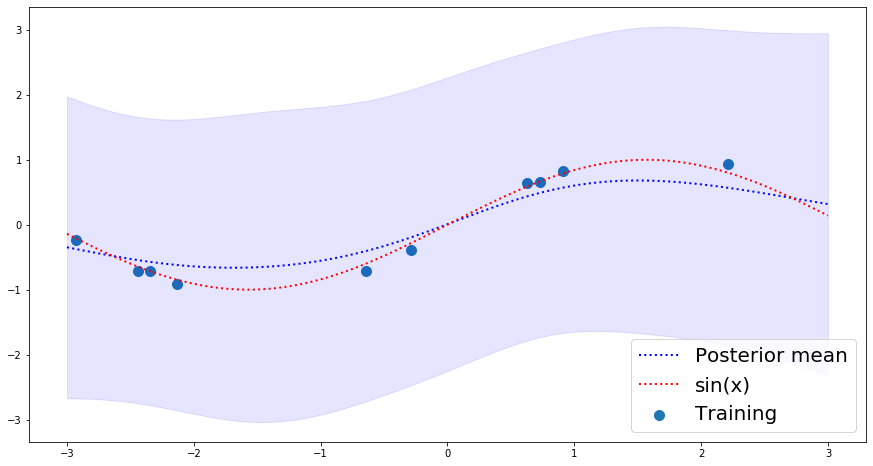

In [10]:
post_mean = m.predict_y(x_test)[0]
post_var = m.predict_y(x_test)[1]

upper_bound = post_mean + 2 * np.sqrt(post_var)
lower_bound = post_mean - 2 * np.sqrt(post_var)

plt.figure(figsize=(15,8))
plt.scatter(x_train,y_train,label='Training',s=100)
plt.plot(x_test,post_mean,'b:', label='Posterior mean',linewidth=2)
plt.fill_between(x_test.reshape((M,)),lower_bound.reshape((M,)),upper_bound.reshape((M,)),alpha=0.1,color='b')
plt.plot(x_test,y_true,'r:', label='sin(x)',linewidth=2)
plt.legend(scatterpoints=1,fontsize=20,loc=4)
# plt.savefig('basic_examp' + '.pdf',bbox_inches='tight')
plt.show()